<a href="https://colab.research.google.com/github/on-kulyashov/Code-for-NMR-course/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Energies of full Hamiltonian:
[-4.75624610e+00 -5.00000000e-01 -1.23259516e-32  5.25624610e+00]
Energies of truncated Hamiltonian:
[-4.75000000e+00 -5.00000000e-01 -1.23259516e-32  5.25000000e+00]


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


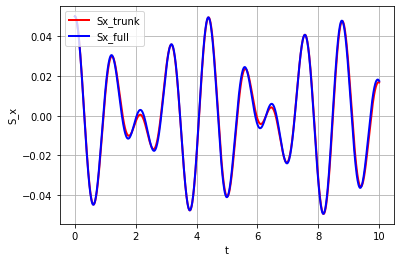

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def spin(i,j):
    sigma = [np.array([[1,0],[0,1]]), np.array([[0,1],[1,0]]), 
             np.array([[0, -1j],[1j, 0]]), np.array([[1, 0],[0, -1]])]
    return np.kron(sigma[i], sigma[j])/4


H = 10
J_y = -1
J_z = 1
ham_full = -H * (spin(3,0) + spin(0,3)) + J_y * spin(2,2) + J_z * spin(3,3)
ham_trunk = -H * (spin(3,0) + spin(0,3)) + J_y * (spin(1,1) + spin(2,2)) / 2 + J_z * spin(3,3)
(val_f, vec_f) = np.linalg.eig(ham_full)
(val_t, vec_t) = np.linalg.eig(ham_trunk)
val_f = np.sort(np.real_if_close(val_f))
val_t = np.sort(np.real_if_close(val_t))
print("Energies of full Hamiltonian:")
print(val_f)
print("Energies of truncated Hamiltonian:")
print(val_t)

rho_i = np.array([[0.5, 0.05],[0.05, 0.5]])
rho_0 = np.kron(rho_i, rho_i)

# RK4 method    
def integrate(f, a, b, y_a, n=1000):
    h = (b-a)/n
    def yn1(f, yn, xn, h):
        k1 = f(xn, yn)
        k2 = f(xn + h/2, yn + h*k1/2)
        k3 = f(xn + h/2, yn + h*k2/2)
        k4 = f(xn + h, yn + h*k3)
        return yn + h/6 * (k1 + 2*k2 + 2*k3 + k4)


    sol = [y_a]
    for i in range(int((b-a)//h) + 1):
        sol.append(yn1(f, sol[-1], a + i*h, h))
    return sol


a = 0
b = 10
# evolution for full Hamiltonian
def neumann_f(x, rho):
    return -1j * (np.matmul(ham_full, rho) - np.matmul(rho, ham_full))


def q_average(rho, op):
    return  np.matrix.trace(np.matmul(rho, op))

Sx = spin(0,1) + spin(1,0)

rho_t_full = integrate(neumann_f, a, b, rho_0)
Sx_t_full = list(map(lambda r: q_average(Sx, r), rho_t_full))

# evolution for trunk Hamiltonian
def neumann_t(x, rho):
    return -1j * (np.matmul(ham_trunk, rho) - np.matmul(rho, ham_trunk))


rho_t_trunk = integrate(neumann_t, a, b, rho_0)
Sx_t_trunk = list(map(lambda r: q_average(Sx, r), rho_t_trunk))

t = np.linspace(a, b, num=len(Sx_t_full))
plt.plot(t,Sx_t_trunk,'r-', linewidth=2.0)
plt.plot(t,Sx_t_full,'b-', linewidth=2.0)
plt.xlabel("t")
plt.ylabel("S_x")
plt.legend(["Sx_trunk","Sx_full"])
plt.grid()
plt.show()